## Regularización y Ajuste de hiperparámetros en Machine learning

**Parametros** => Se aprenden
- Pesos de interconexión entre neuronas (w) => Deben ser valores bajos para mejor precisión
- Bias de neuronas (b)

**Hyperparametros** => Se deben decidir (Ajustar para que generalice y le de mas velocidad de entrenamiento)
- Cantidad de capas ocultas
- Cantidad de unidades por capa
- Funciones de activación
- Learning rates
- Optimizadores
- Batch-size
- Inicialización
- Momentum => Log (entre 0.9 y 0.999)
- Probabilidad de dropout

### Overfitting (Sobreajuste)
- Es el efecto de sobreentrenar un algoritmo de aprendizaje con unos ciertos datos para los que se conoce el resultado deseado.

##### Soluciones
- Ajuste de la cantidad de parametros
- Early stop
- Inicialización de pesos
- Regularización L0, L1, L2
- Dropout (Solo para redes neuronales)
- Batch Normalization
- Aumentar el tamaño del dataset: Buscar más datos o generarlo en forma artificial (Data augmentation)

---
### 1. Ajuste de la cantidad de parametros

In [12]:
%load_ext autoreload
%autoreload 2
import reg_helper as RHelper
import numpy as np
import draw_nn
from matplotlib import pyplot as plt
from fnn_helper import PlotLosses
from keras import optimizers
from keras.layers.core import Dense, Activation, Dropout
from keras.models import Sequential
from keras.constraints import max_norm
from keras.layers import BatchNormalization

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
X_train = np.load('X_train.npy')
X_test = np.load('X_test.npy')
y_train = np.load('y_train.npy') 
y_test = np.load('y_test.npy')

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


Regresion Logistica Polinomial de orden 18, con lamdba (regularización L2):0


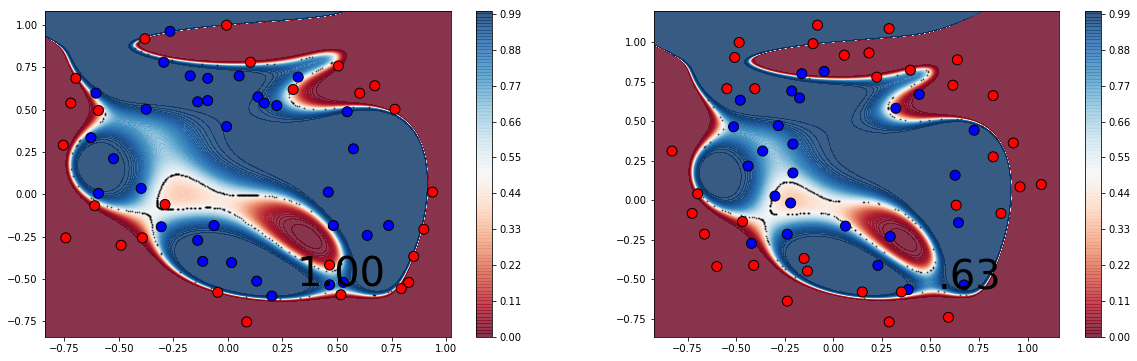

In [3]:
_ = RHelper.fit_and_get_regions(X_train, y_train, X_test, y_test, degree=18)

Se nota claramente el overfitting, ya que se aprendió mucho los datos de train (Accuracy 1.00) pero los datos de test tienen muy mala Accuracy (0.63)

No handles with labels found to put in legend.


Cantidad de parametros en función del orden del polinomio


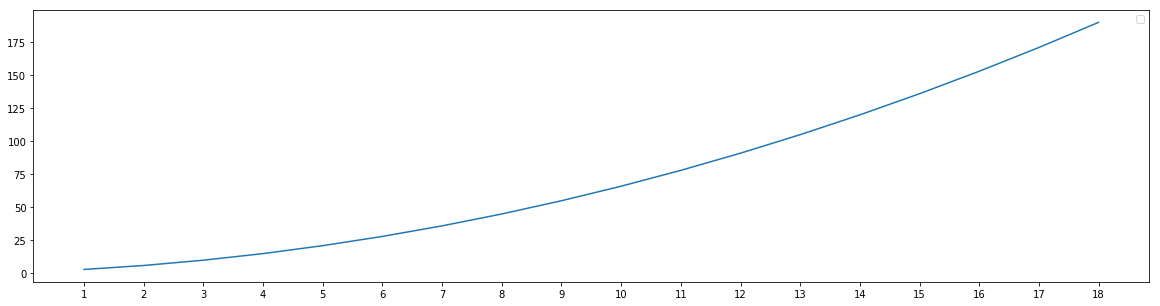

Accuracies


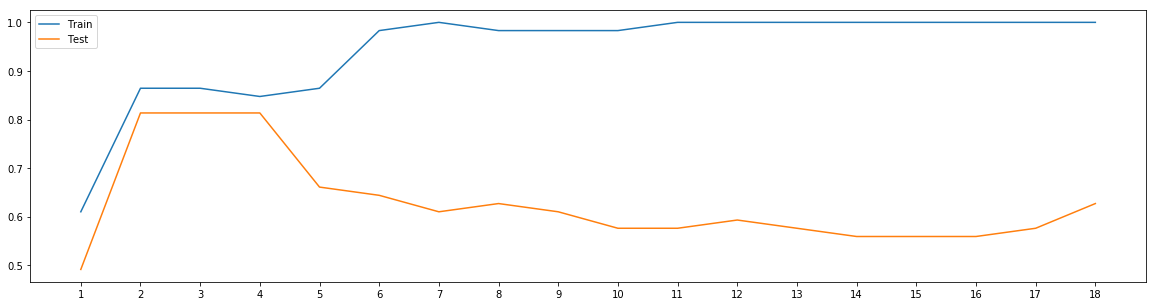

In [4]:
options = [{'degree': 1, 'lambd': 0}, 
           {'degree': 2, 'lambd': 0}, 
           {'degree': 3, 'lambd': 0}, 
           {'degree': 4, 'lambd': 0}, 
           {'degree': 5, 'lambd': 0}, 
           {'degree': 6, 'lambd': 0}, 
           {'degree': 7, 'lambd': 0}, 
           {'degree': 8, 'lambd': 0}, 
           {'degree': 9, 'lambd': 0}, 
           {'degree': 10, 'lambd': 0},
           {'degree': 11, 'lambd': 0},
           {'degree': 12, 'lambd': 0},
           {'degree': 13, 'lambd': 0},
           {'degree': 14, 'lambd': 0}, 
           {'degree': 15, 'lambd': 0}, 
           {'degree': 16, 'lambd': 0}, 
           {'degree': 17, 'lambd': 0}, 
           {'degree': 18, 'lambd': 0}
           ]
degrees_0, lambdas_0, train_acc_array_0, test_acc_array_0, coefs_array_mean_0, coefs_array_std_0, coefs_abs_max_0, coefs_norm, coefs_num = RHelper.test_options(X_train, y_train, X_test, y_test, options, plot_it=False)

print("Cantidad de parametros en función del orden del polinomio")
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(degrees_0, coefs_num)
ax.legend()
ax.set_xticks(degrees_0)
plt.show()
print("Accuracies")
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(degrees_0, train_acc_array_0, label="Train")
ax.plot(degrees_0, test_acc_array_0, label="Test")
ax.set_xticks(degrees_0)
ax.legend()
plt.show()

Regresion Logistica Polinomial de orden 3, con lamdba (regularización L2):0


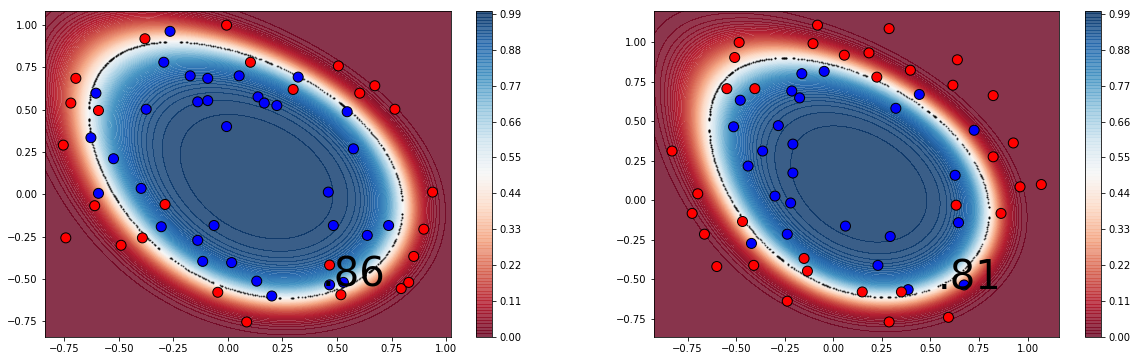

In [5]:
_ = RHelper.fit_and_get_regions(X_train, y_train, X_test, y_test, degree=3)

Se puede notar como mejoró el overfitting con un degree de 3. Si bien bajó el accuracy en los datos de train, mejoró el accuracy en los datos de test, que es lo que realmente importa.

---
### 2. Ajuste de la cantidad de parámetros

##### - 100 unidades en la capa oculta

In [151]:
input_shape = 2
hidden_units = 100
output_size = 1

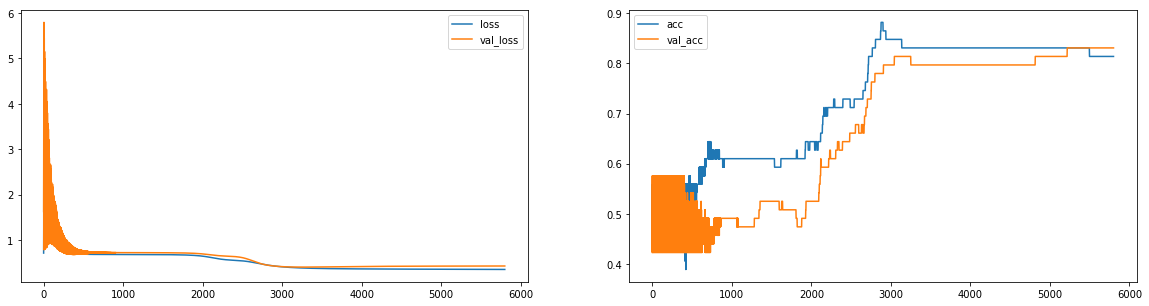

In [152]:
lr = 1
decay = 0
momentum = 0
epochs = 6000
optim = optimizers.sgd(lr=lr, decay=decay, momentum=momentum)
batch_size = 59

plot_losses = PlotLosses(plot_interval=200, evaluate_interval=None, x_val=X_test, y_val_categorical=y_test)
two_layer_model = RHelper.get_two_layer_model_L2(input_shape, 
                                                 output_size, 
                                                 hidden_units=hidden_units, 
                                                 lr=lr, 
                                                 l2_lambda=0, 
                                                 decay=decay,
                                                 optim = optim
                                                )
two_layer_model.fit(X_train, 
          y_train, batch_size = batch_size,
          epochs=epochs, 
          verbose=0, 
          validation_data=(X_test, y_test), 
          callbacks=[plot_losses],
         )

59/59 [==============================] - 0s 42us/step
(37240, 1)
59/59 [==============================] - 0s 50us/step
(43888, 1)


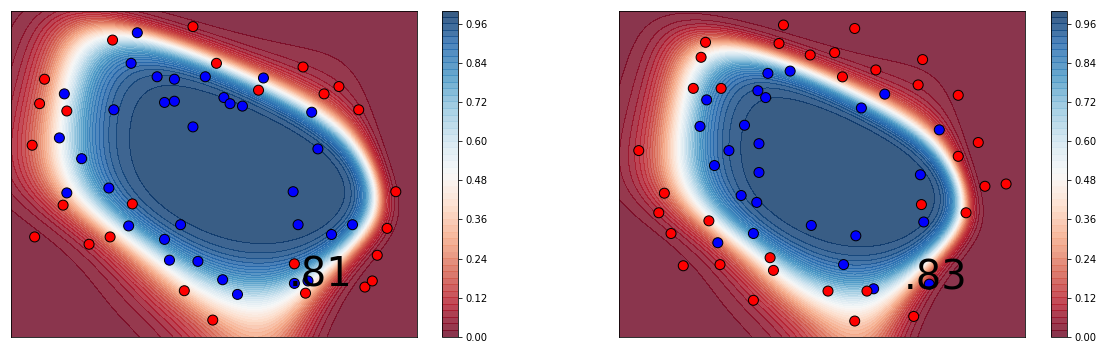

In [153]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
RHelper.plot_boundaries_keras(X_train, y_train, two_layer_model.evaluate(X_train, y_train)[1], two_layer_model.predict_proba, h = 0.01, margin=0.1, ax=ax1)
RHelper.plot_boundaries_keras(X_test, y_test, two_layer_model.evaluate(X_test, y_test)[1], two_layer_model.predict_proba, h = 0.01, margin=0.1, ax=ax2)
plt.show()

##### - 5 unidades en la capa oculta

In [162]:
input_shape = 2
hidden_units = 5
output_size = 1

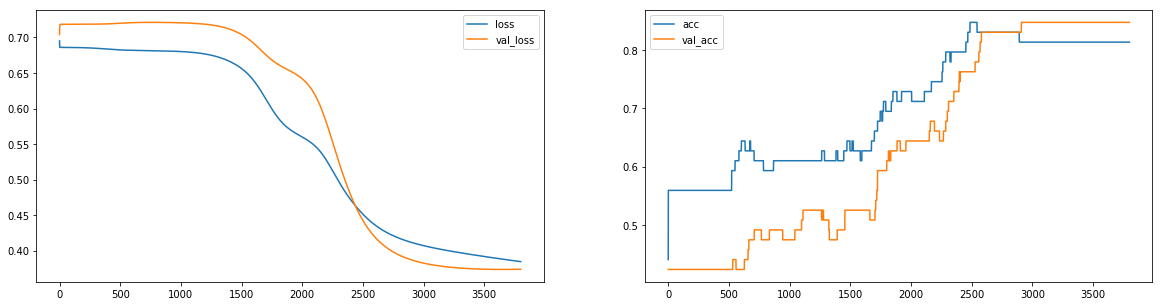

In [163]:
lr = 1
decay = 0
momentum = 0
epochs = 4000
optim = optimizers.sgd(lr=lr, decay=decay, momentum=momentum)
batch_size = 59

plot_losses = PlotLosses(plot_interval=200, evaluate_interval=None, x_val=X_test, y_val_categorical=y_test)
two_layer_model = RHelper.get_two_layer_model_L2(input_shape, 
                                                 output_size, 
                                                 hidden_units=hidden_units, 
                                                 lr=lr, 
                                                 l2_lambda=0, 
                                                 decay=decay,
                                                 optim = optim
                                                )
two_layer_model.fit(X_train, 
          y_train, batch_size = batch_size,
          epochs=epochs, 
          verbose=0, 
          validation_data=(X_test, y_test), 
          callbacks=[plot_losses],
         )

59/59 [==============================] - 0s 50us/step
(37240, 1)
59/59 [==============================] - 0s 47us/step
(43888, 1)


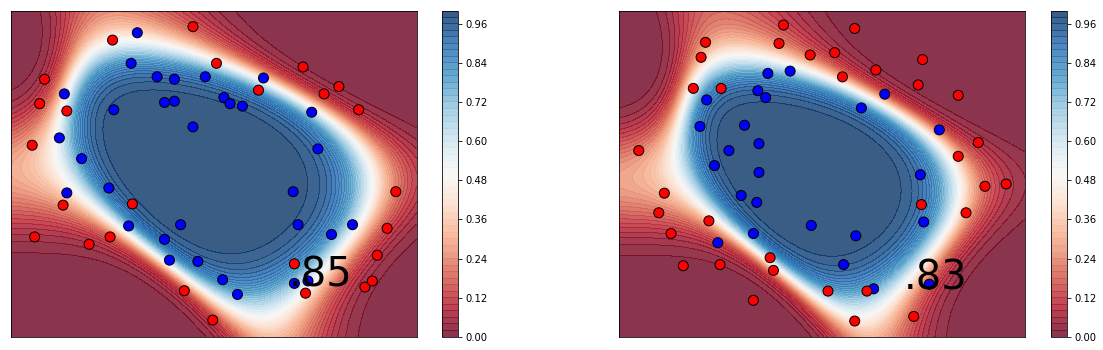

In [159]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
RHelper.plot_boundaries_keras(X_train, y_train, two_layer_model.evaluate(X_train, y_train)[1], two_layer_model.predict_proba, h = 0.01, margin=0.1, ax=ax1)
RHelper.plot_boundaries_keras(X_test, y_test, two_layer_model.evaluate(X_test, y_test)[1], two_layer_model.predict_proba, h = 0.01, margin=0.1, ax=ax2)
plt.show()

Bajamos la cantidad de unidades en la capa oculta, y notamos como mejora el Accuracy.

---
### 3. Modificar Optimizadores

##### - Adam Optimizer

In [176]:
input_shape = 2
hidden_units = 30
output_size = 1

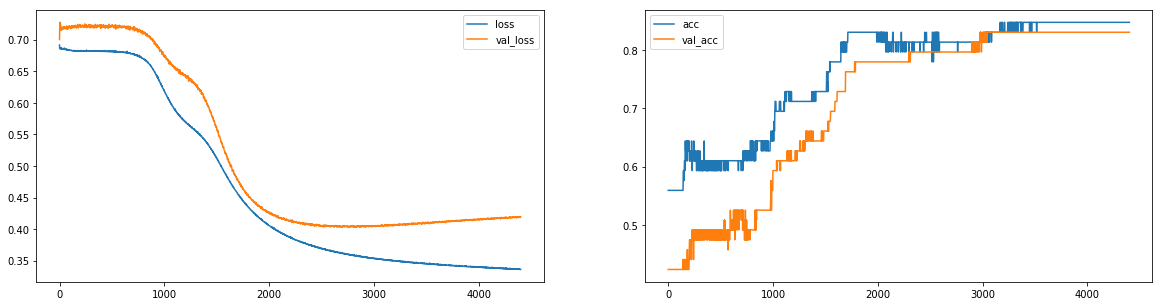

In [177]:
lr = 0.004
decay = 0.00001
momentum = 0.0009
epochs = 4500
optim = optimizers.adam(lr=lr, decay=decay)
batch_size = 30

plot_losses = PlotLosses(plot_interval=200, evaluate_interval=None, x_val=X_test, y_val_categorical=y_test)
two_layer_model = RHelper.get_two_layer_model_L2(input_shape, 
                                                 output_size, 
                                                 hidden_units=hidden_units, 
                                                 lr=lr, 
                                                 l2_lambda=0, 
                                                 decay=decay,
                                                 optim = optim
                                                )
two_layer_model.fit(X_train, 
          y_train, batch_size = batch_size,
          epochs=epochs, 
          verbose=0, 
          validation_data=(X_test, y_test), 
          callbacks=[plot_losses],
         )

59/59 [==============================] - 0s 55us/step
(37240, 1)
59/59 [==============================] - 0s 51us/step
(43888, 1)


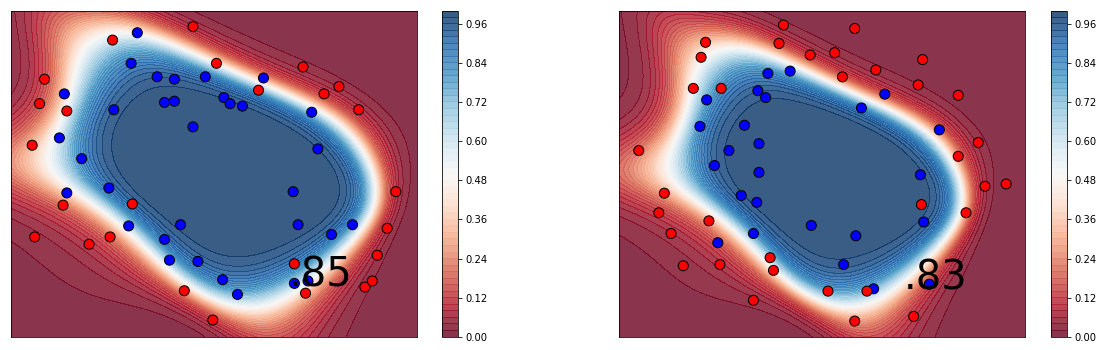

In [178]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
RHelper.plot_boundaries_keras(X_train, y_train, two_layer_model.evaluate(X_train, y_train)[1], two_layer_model.predict_proba, h = 0.01, margin=0.1, ax=ax1)
RHelper.plot_boundaries_keras(X_test, y_test, two_layer_model.evaluate(X_test, y_test)[1], two_layer_model.predict_proba, h = 0.01, margin=0.1, ax=ax2)
plt.show()

##### - rmsprop Optimizer

In [7]:
input_shape = 2
hidden_units = 30
output_size = 1

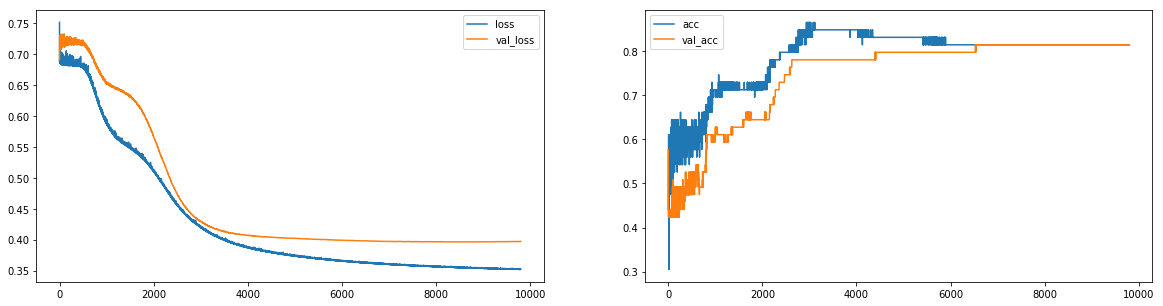

In [182]:
lr = 0.01
decay = 0.001
momentum = 0.09
epochs = 10000
#optim = optimizers.rmsprop(lr=0.01, decay=0.001)
optim = optimizers.rmsprop(lr=lr, decay=decay)
batch_size = 30

plot_losses = PlotLosses(plot_interval=200, evaluate_interval=None, x_val=X_test, y_val_categorical=y_test)
two_layer_model = RHelper.get_two_layer_model_L2(input_shape, 
                                                 output_size, 
                                                 hidden_units=hidden_units, 
                                                 lr=lr, 
                                                 l2_lambda=0, 
                                                 decay=decay,
                                                 optim = optim
                                                )
two_layer_model.fit(X_train, 
          y_train, batch_size = batch_size,
          epochs=epochs, 
          verbose=0, 
          validation_data=(X_test, y_test), 
          callbacks=[plot_losses],
         )

59/59 [==============================] - 0s 51us/step
(37240, 1)
59/59 [==============================] - 0s 49us/step
(43888, 1)


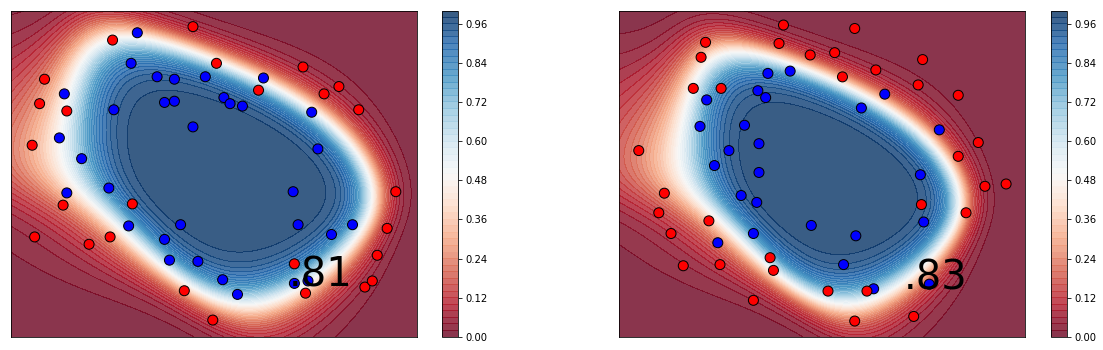

In [183]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
RHelper.plot_boundaries_keras(X_train, y_train, two_layer_model.evaluate(X_train, y_train)[1], two_layer_model.predict_proba, h = 0.01, margin=0.1, ax=ax1)
RHelper.plot_boundaries_keras(X_test, y_test, two_layer_model.evaluate(X_test, y_test)[1], two_layer_model.predict_proba, h = 0.01, margin=0.1, ax=ax2)
plt.show()

---
### 4. Regularización

##### - Regularización L2

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


Regresion Logistica Polinomial de orden 18, con lamdba (regularización L2):1e-06


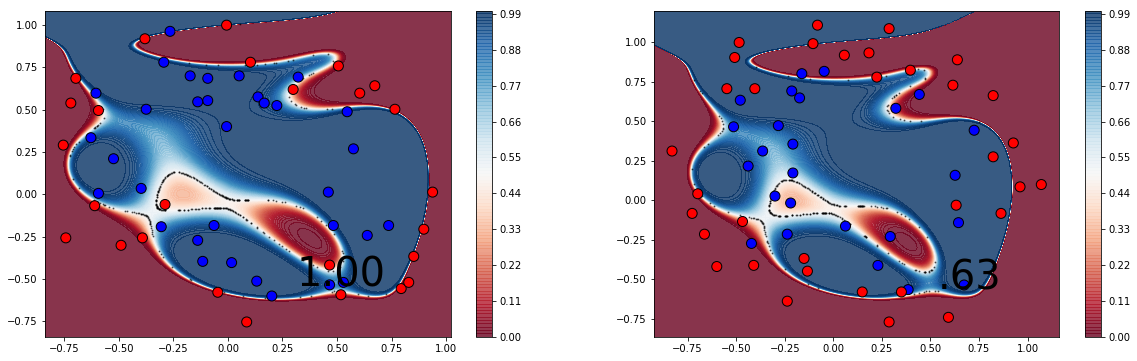

Regresion Logistica Polinomial de orden 18, con lamdba (regularización L2):0.001


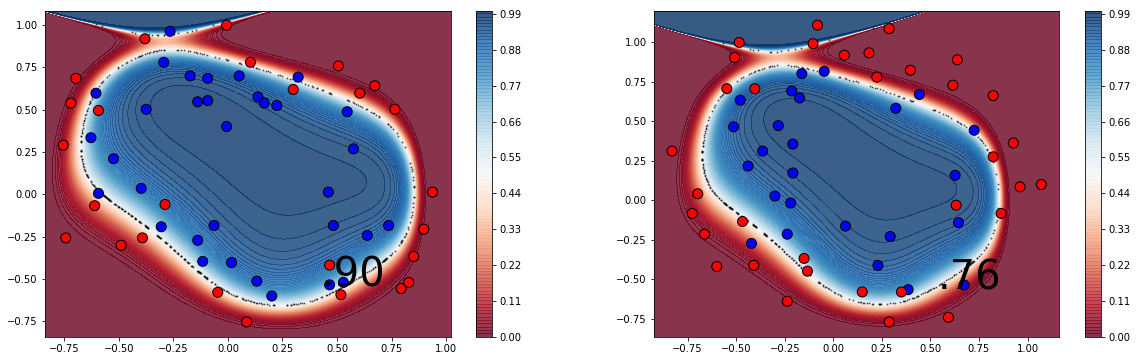

Regresion Logistica Polinomial de orden 18, con lamdba (regularización L2):0.01


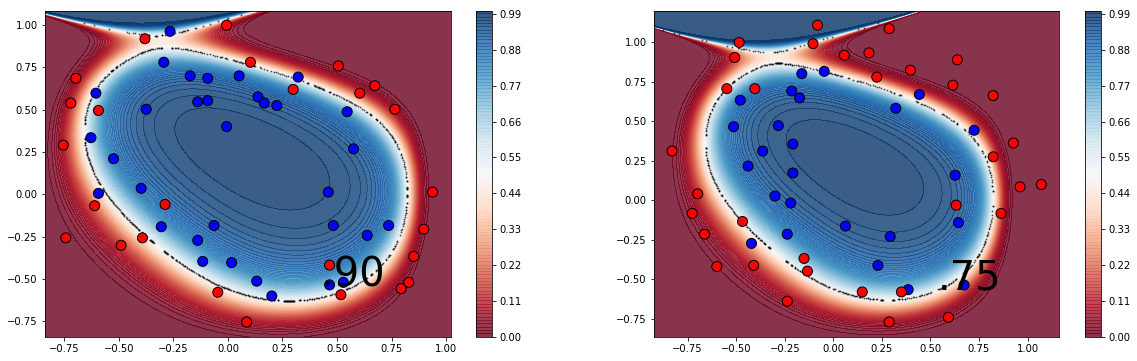

Regresion Logistica Polinomial de orden 18, con lamdba (regularización L2):0.1


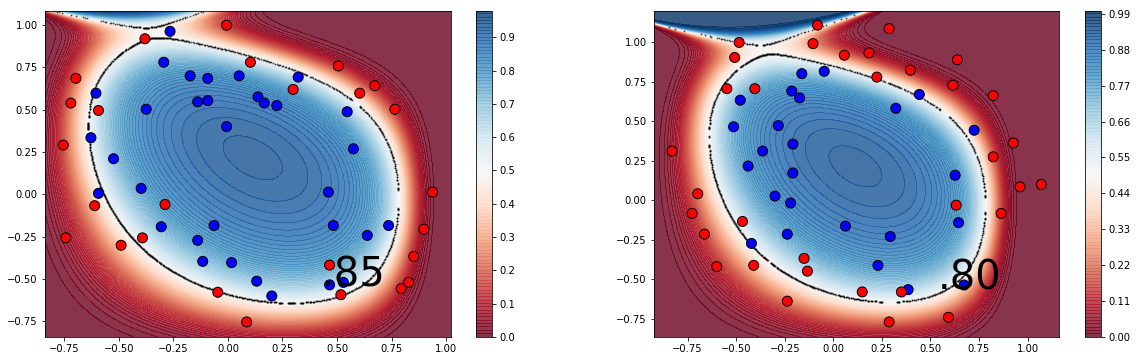

Regresion Logistica Polinomial de orden 18, con lamdba (regularización L2):0.3


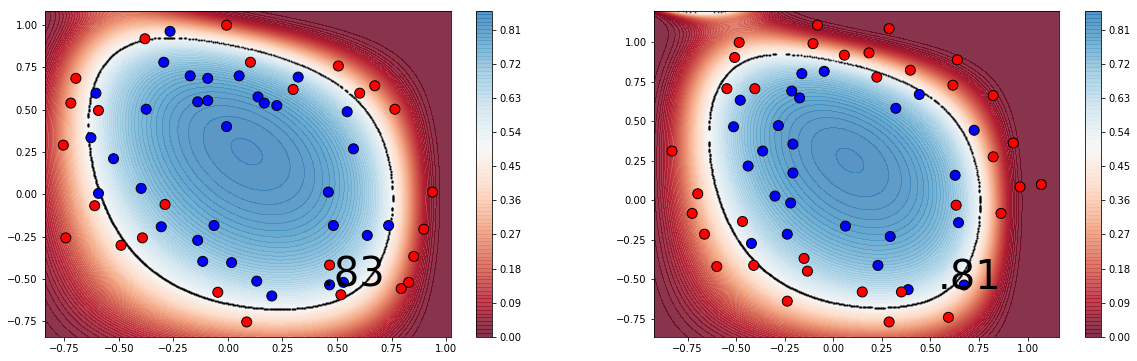

Regresion Logistica Polinomial de orden 18, con lamdba (regularización L2):0.5


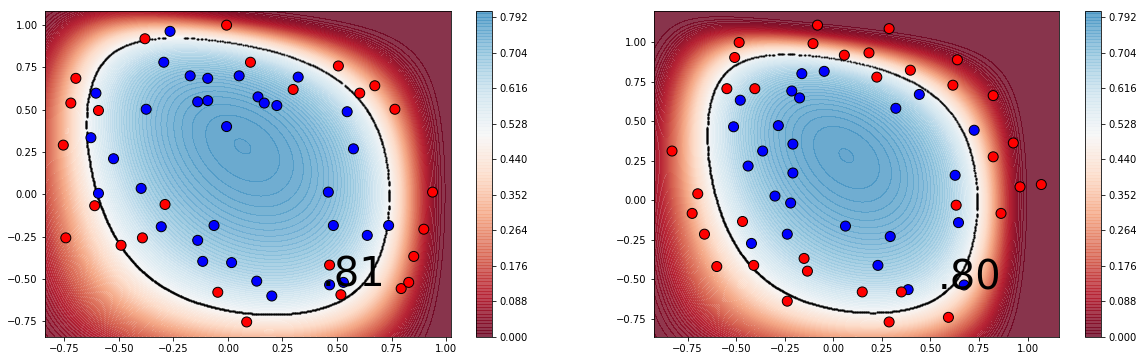

Regresion Logistica Polinomial de orden 18, con lamdba (regularización L2):1


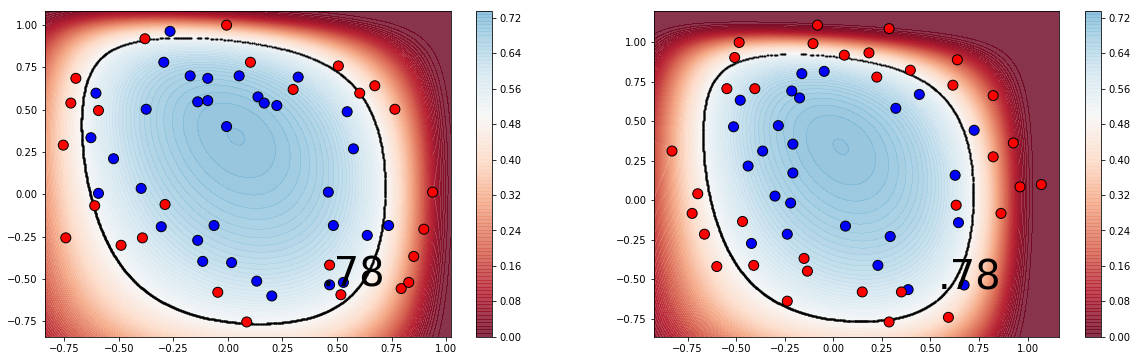

Regresion Logistica Polinomial de orden 18, con lamdba (regularización L2):2


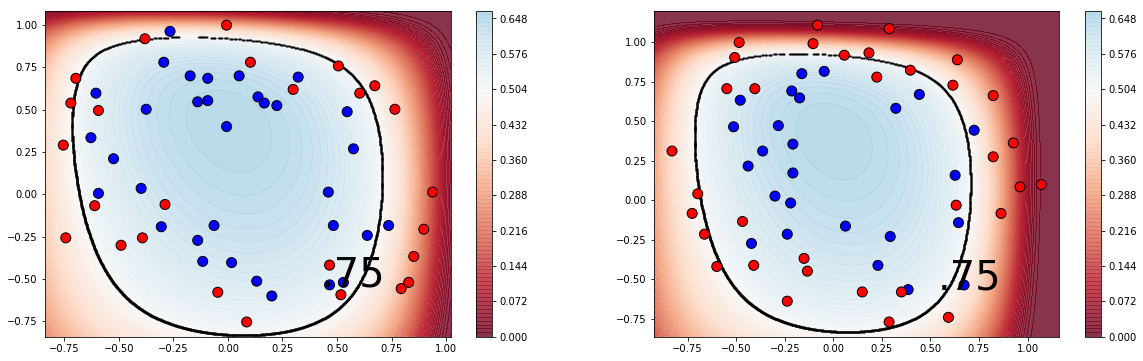

Regresion Logistica Polinomial de orden 18, con lamdba (regularización L2):5


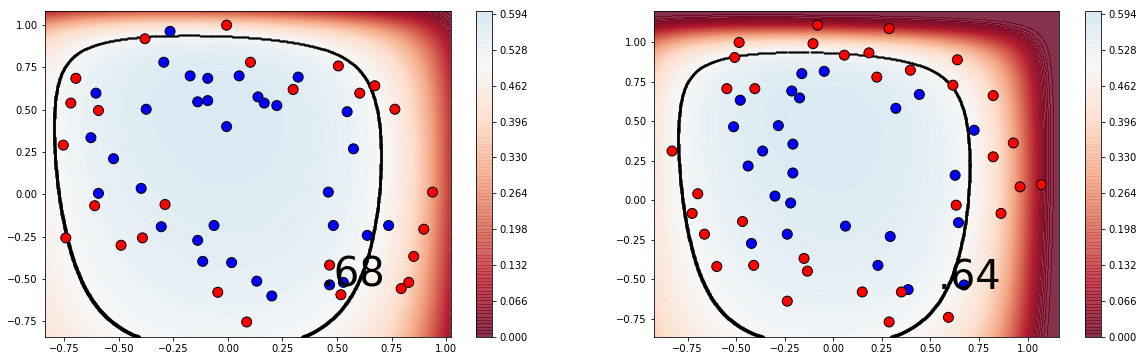

In [187]:
options = [{'degree': 18, 'lambd': 0.000001}, 
           {'degree': 18, 'lambd': 0.001},
           {'degree': 18, 'lambd': 0.01}, 
           {'degree': 18, 'lambd': 0.1}, 
           {'degree': 18, 'lambd': 0.3}, 
           {'degree': 18, 'lambd': 0.5}, 
           {'degree': 18, 'lambd': 1},
           {'degree': 18, 'lambd': 2},
           {'degree': 18, 'lambd': 5},
           ]
degrees_0, lambdas_0, train_acc_array_0, test_acc_array_0, coefs_array_mean_0, coefs_array_std_0, coefs_abs_max_0, coefs_norm, coefs_num = RHelper.test_options(X_train, y_train, X_test, y_test, options, plot_it=True)
#degrees, lambdas, train_acc_array, test_acc_array, coefs_array_mean,  coefs_array_std= test_options(options, plot_it=True)

---
### 5. Dropout

- Elimina conexiones aleatoriamente al momento de entrenamiento (Especificamente, multiplica por cero algunas de las activaciones a la salida de una capa o eventualmente a la entrada de la red, aunque esto no es tan usual)
- keep_prob => probabilidad de que las conexiones no se eliminen
- En keras se define el dropout_rate que es (1 - keep_prob)
- Al momento de entrenamiento, cuando se eliminan las conexiones, se dividen las salidas de las activaciones por 1/keep_prob para mantener en promedio lo que llega a la capa siguiente.
- En momento de evaluación no se eliminan conexiones.

**Tips:**  
- Usar un valor bajo entre 20% y 50%
- Usar una "red grande", muchos parámetros.
- Usarlo tanto en la capa visible (entrada) como en las capas ocultas. La aplicación de dropout en cada capa ha mostrado buenos resultados.
- Usar un learning rate grande con decay y momentum. Incrementar el learning rate por un factor de 10 o hasta 100 y usar momentum del entre 0.9 y 0.99.
- Usar max-norm. Valores en el orden de 4 o 5 han mostrado buenos resultados

<img src="../Imagenes/dropout.png" alt="Drawing" style="width:60%;"/>

In [8]:
# Armamos la red con keras
print("Hidden units",hidden_units)
print("Input shape",input_shape)
print("Output size",output_size)
dropout_rate = 0.25
max_norm_cons = 10.0
model_do = Sequential()
# Una capa oculta de 'hidden_units' capas ocultas
model_do.add(Dense(hidden_units,input_dim=input_shape, kernel_constraint=max_norm(max_norm_cons)))
model_do.add(Activation('sigmoid')) # La sigmoida
model_do.add(Dropout(dropout_rate)) # Dropout => con un 'dropout_rate' de conexiones eliminadas
model_do.add(Dense(output_size))    # Otra capa, con un 'output_size' unidades de salida
model_do.add(Activation('sigmoid')) # Otra sigmoida a la salida
model_do.summary()

Hidden units 30
Input shape 2
Output size 1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                90        
_________________________________________________________________
activation_1 (Activation)    (None, 30)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


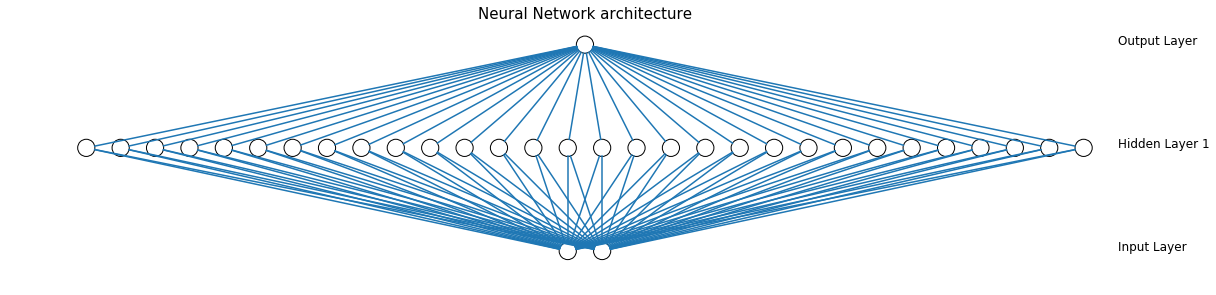

In [9]:
network = draw_nn.DrawNN( [input_shape, hidden_units, output_size] )
network.draw()

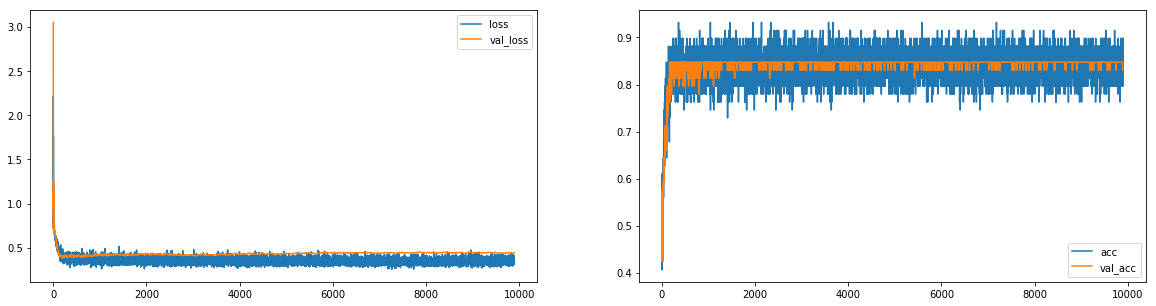

In [10]:
lr = 0.4 
decay = 0.005 
batch_size = 59 
epochs = 10000
selectedOptimizer = optimizers.adam(lr=lr, decay=decay)
model_do.compile(loss = 'binary_crossentropy', optimizer=selectedOptimizer, metrics=['accuracy'])
plot_losses_do = PlotLosses(plot_interval=100, evaluate_interval=None, x_val=X_test, y_val_categorical=y_test)

model_do.fit(X_train, 
          y_train, batch_size = batch_size,
          epochs=epochs, 
          verbose=0, 
          validation_data=(X_test, y_test), 
          callbacks=[plot_losses_do],
         )

59/59 [==============================] - 0s 59us/step
(37240, 1)
59/59 [==============================] - 0s 59us/step
(43888, 1)


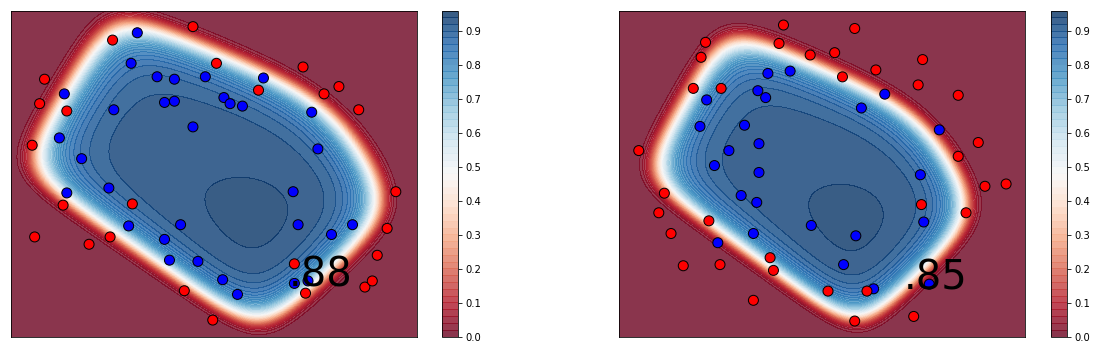

In [11]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
RHelper.plot_boundaries_keras(X_train, y_train, model_do.evaluate(X_train, y_train)[1], model_do.predict_proba, h = 0.01, margin=0.1, ax=ax1)
RHelper.plot_boundaries_keras(X_test, y_test, model_do.evaluate(X_test, y_test)[1], model_do.predict_proba, h = 0.01, margin=0.1, ax=ax2)
plt.show()

---
### 6. Batch Normalization

Soluciona el problema de la "Covariate Shift", acelerando el entrenamiento y nos da de regalo regularización.

In [13]:
model_bn = Sequential()
model_bn.add(Dense(hidden_units,input_dim=input_shape, use_bias=False))
model_bn.add(BatchNormalization())
model_bn.add(Activation('sigmoid'))
model_bn.add(Dense(output_size, use_bias=False))
model_bn.add(BatchNormalization())
model_bn.add(Activation('sigmoid'))
model_bn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 30)                60        
_________________________________________________________________
batch_normalization_1 (Batch (None, 30)                120       
_________________________________________________________________
activation_3 (Activation)    (None, 30)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 30        
_________________________________________________________________
batch_normalization_2 (Batch (None, 1)                 4         
_________________________________________________________________
activation_4 (Activation)    (None, 1)                 0         
Total params: 214
Trainable params: 152
Non-trainable params: 62
_________________________________________________________________


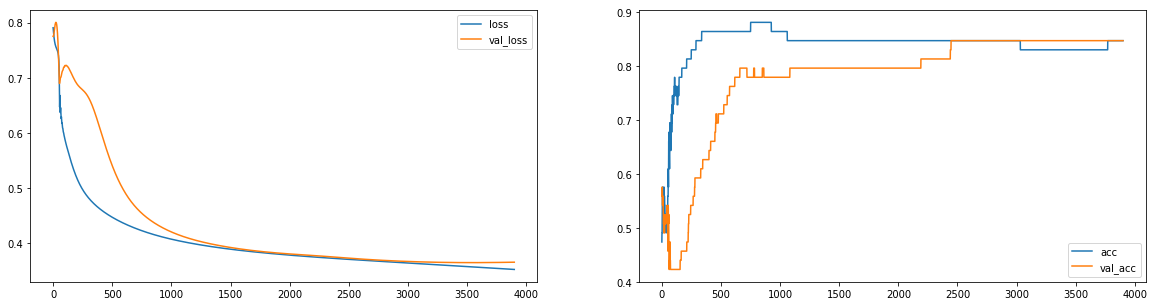

In [14]:
lr = 0.001 
decay = 0.001 
batch_size = 59 
epochs = 4000
selectedOptimizer = optimizers.adam(lr=lr, decay=decay)
model_bn.compile(loss = 'binary_crossentropy', optimizer=selectedOptimizer, metrics=['accuracy'])
plot_losses_bn = PlotLosses(plot_interval=100, evaluate_interval=None, x_val=X_test, y_val_categorical=y_test)

model_bn.fit(X_train, 
          y_train, batch_size = batch_size,
          epochs=epochs, 
          verbose=0, 
          validation_data=(X_test, y_test), 
          callbacks=[plot_losses_bn],
         )

59/59 [==============================] - 0s 69us/step
(37240, 1)
59/59 [==============================] - 0s 54us/step
(43888, 1)


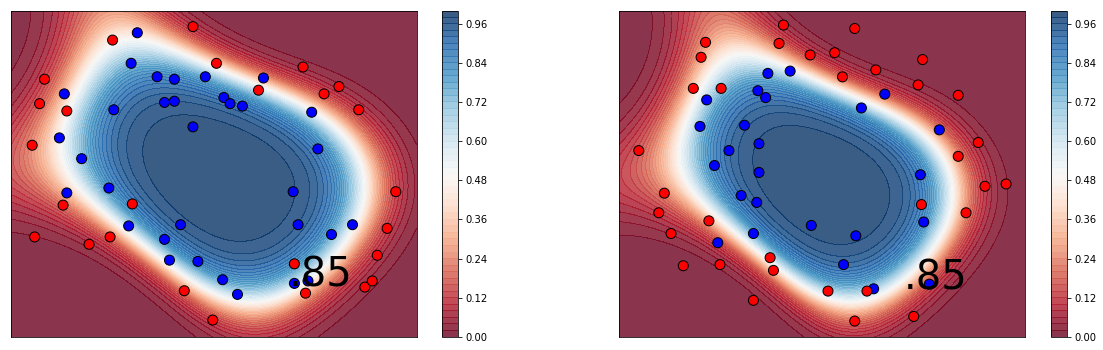

In [15]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
RHelper.plot_boundaries_keras(X_train, y_train, model_bn.evaluate(X_train, y_train)[1], model_bn.predict_proba, h = 0.01, margin=0.1, ax=ax1)
RHelper.plot_boundaries_keras(X_test, y_test, model_bn.evaluate(X_test, y_test)[1], model_bn.predict_proba, h = 0.01, margin=0.1, ax=ax2)
plt.show()